# Load cleaned data

In [1]:
DATA_FILE="newspapers_filtered_2024-04-30_18-17-52.jsonl"

from json import loads

data = [
    loads(line)
    for line in open(DATA_FILE, "r", encoding="utf-8").readlines()
]

print(f"Loaded {len(data)} records")

data[:3]

Loaded 84593 records


[{'title': 'International de Sète : la pétanque, une affaire de famille chez les Monjo',
  'text': 'L\'international de pétanque de Sète, avait lieu ce week-end des 5 et 6 mars. 2000 joueurs sont venus s\'affronter pour cette quatrième édition. Parmi eux, les Monjo, une famille de passionnés chez qui les boules se transmettent de génération en génération.\n\nTriplettes seniors, doublettes féminines mais aussi nationales jeunes minimes et cadets...la compétition s\'est emparée du parking du Mas Coulet à Sète ce weekend du 5 mars.\n\nLa compétition internationale de pétanque de Sète a fait son grand retour. L\'édition de l\'an dernier avait été annulée à cause de la pandémie. Ce weekend, 2000 joueurs ont été ravis de pourvoir à nouveau tirer et pointer sous le soleil sétois.\n\nUn sport dès le plus jeune âge\n\nLes enfants n\'ont pas été que supporters dans les gradins, bien au contraire. Thibault est le cadet de la famille Monjo, passionnée de pétanque. A 9 ans, il représente déjà le bl

### To dataframe

In [2]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,title,text,date,article_id,article_url,article_domain
0,"International de Sète : la pétanque, une affai...","L'international de pétanque de Sète, avait lie...",2022-03-07,2047761,https://france3-regions.francetvinfo.fr/occitanie,france3-regions.francetvinfo.fr
1,Savoie. Discrimination raciale: quatre chauffe...,Le tribunal de commerce de Chambéry va connaît...,2023-09-06,None,https://www.ledauphine.com/faits-divers-justic...,ledauphine.com
2,"TÉMOIGNAGE. Les Restos du Coeur recrutent : ""o...",La 38e campagne d’hiver de l’association comme...,2022-11-09,2651444,https://france3-regions.francetvinfo.fr/occita...,france3-regions.francetvinfo.fr
3,"Mars bleu, pour favoriser le dépistage du canc...",Sur le même sujet Dordogne : contre le cancer ...,2022-03-11,None,https://www.sudouest.fr/dordogne/thiviers/mars...,sudouest.fr
4,"Sète : ""C'est un album très rock 'n' Roll""","Le 30 septembre, l'album des Wampas sera dans ...",2022-09-23,None,https://www.midilibre.fr/2022/09/23/sete-cest-...,midilibre.fr


# Preprocessing

In [ ]:
#Preprocess the text if needed (lowercase, remove punctuation, remove stopwords, etc.)

In [4]:
titles = df["title"].str.lower()

titles[:3]

0    international de sète : la pétanque, une affai...
1    savoie. discrimination raciale: quatre chauffe...
2    témoignage. les restos du coeur recrutent : "o...
Name: title, dtype: object

## Removing punctuation

In [36]:
import string

translator = str.maketrans('', '', string.punctuation)

titles.str.translate(translator)

0        international de sète  la pétanque une affaire...
1        savoie discrimination raciale quatre chauffeur...
2        témoignage les restos du coeur recrutent  on e...
3        mars bleu pour favoriser le dépistage du cance...
4                     sète  cest un album très rock n roll
                               ...                        
84588    football fc arsac le pianmédoc  l’assemblée gé...
84589    10 ans du louvrelens  retour sur 10 exposition...
84590    soustons  le fab lab l’établi un lieu foisonna...
84591    sévignacq  grosse mobilisation pour fêter le c...
84592    confolens  le comité des fêtes aborde sereinem...
Name: title, Length: 84593, dtype: object

## Stemming and lemmatization


### Getting stop words

In [37]:
import requests
stopwords_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-fr/master/stopwords-fr.txt"
github_french_stopwords = requests.get(stopwords_url).text.split()

github_french_stopwords.extend([
    "quelqu",
    "ans",
    ])

github_french_stopwords[:5]

['a', 'abord', 'absolument', 'afin', 'ah']

## Vectorization

 You can specify parameters like ngram_range, max_features etc. to customize the vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(

    stop_words=github_french_stopwords,
)



## Fitting

In [39]:
tfidf_matrix = vectorizer.fit_transform(titles)

In [40]:
print("Vocabulary:", vectorizer.vocabulary_)
print("IDF values:", vectorizer.idf_)

Vocabulary: {'international': 28315, 'sète': 51499, 'pétanque': 43492, 'affaire': 1811, 'famille': 21215, 'monjo': 35409, 'savoie': 48494, 'discrimination': 16588, 'raciale': 43818, 'chauffeurs': 11451, 'portent': 41748, 'plainte': 41039, 'société': 49866, 'taxi': 52079, 'chambéry': 11026, 'témoignage': 54160, 'restos': 45555, 'coeur': 12599, 'recrutent': 44649, 'nourri': 37695, 'donne': 17007, 'confie': 13383, 'bénévole': 9242, 'mars': 33706, 'bleu': 7352, 'favoriser': 21422, 'dépistage': 18417, 'cancer': 9762, 'colorectal': 12838, 'lancé': 30682, 'thiviers': 52533, 'album': 2369, 'rock': 46217, 'roll': 46297, 'haute': 26065, 'chamonix': 11042, 'olga': 38295, 'chappaz': 11228, 'dignement': 16424, 'fêtée': 23427, 'ski': 49698, 'club': 12439, 'vosges': 56261, 'bailleur': 5624, 'social': 49839, 'vosgelis': 56260, 'accorde': 1356, 'congé': 13474, 'naissance': 36881, 'semaines': 48952, 'parents': 39466, 'info': 27890, 'midi': 34730, 'libre': 31483, 'mort': 35827, 'aimée': 2200, 'prat': 421

In [41]:
import numpy as np

# Get the feature names (unique words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the sum of TF-IDF scores for each word across all documents
word_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
word_freq = dict(zip(feature_names, word_scores))


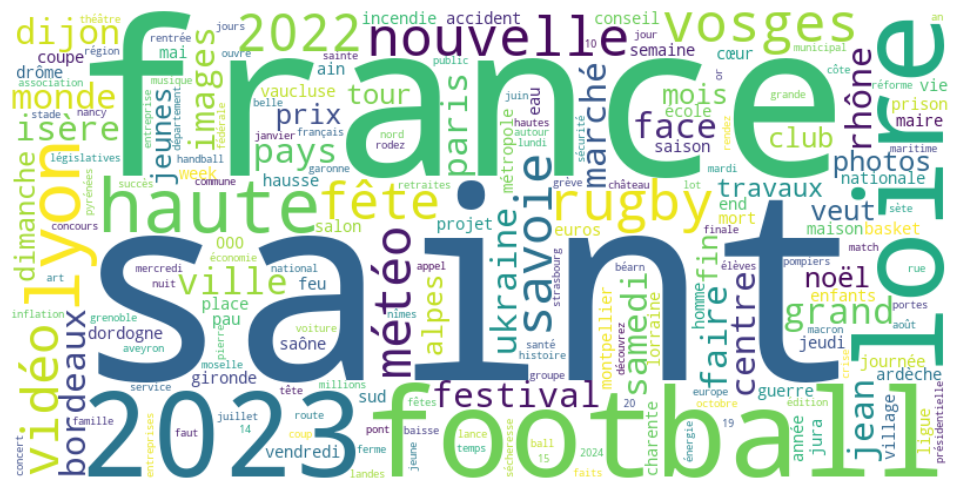

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create the word cloud using the TF-IDF scores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()